In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()

In [2]:
def find_sentiment(scores):
    if(scores['compound']>0):
        return "Positive"
    elif(scores['compound']<0):
        return "Negative"
    else:
        return "Neutral"
    

In [3]:
def calc_rating(scores):
    rating=((1+scores)/2)*5
    return rating

In [4]:
df=pd.read_csv('flipkart.csv')
sentiment_scores=[]
sentiment_names=[]
predicted_ratings=[]
for i,j in zip(df['Review'],range(len(df['Review']))):
    score = sentiments.polarity_scores(i)
    sentiment_name=find_sentiment(score)
    predicted_rating=calc_rating(score['compound'])
    sentiment_scores.append(score['compound'])
    sentiment_names.append(sentiment_name)
    predicted_ratings.append(predicted_rating)

In [5]:
df['Sentiment Score']=sentiment_scores
df['Sentiment']=sentiment_names
df['Predicted Rating']=predicted_ratings

In [6]:
df.to_csv('flipkart_output.csv')

([<matplotlib.axis.XTick at 0x25c1e02a110>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

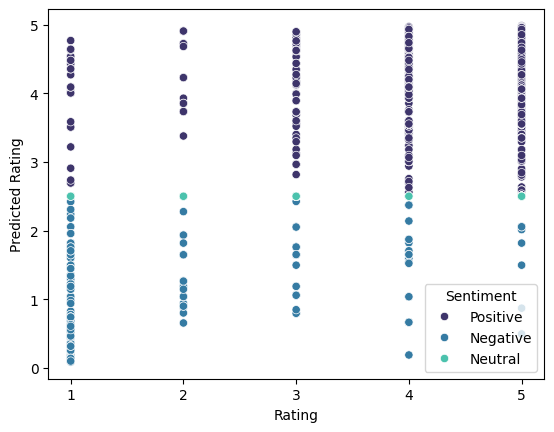

In [7]:
sns.scatterplot(x=df["Rating"],y=df["Predicted Rating"],hue=df["Sentiment"],palette="mako")
plt.xticks([1,2,3,4,5])